# 🚗 Vehicle Price Prediction Analysis

*An intelligent approach to predicting vehicle prices based on specifications and features*

---

## 🎯 Project Objective

This analysis aims to build a predictive model that can accurately estimate vehicle prices based on their specifications and features. By understanding which factors most significantly impact pricing, car buyers, sellers, and manufacturers can make more informed decisions about vehicle valuation, purchasing, and pricing strategies.

In [46]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Configure visualization settings
plt.style.use('ggplot')  # Use ggplot style for visualizations
sns.set_palette('viridis')  # Use viridis color palette
warnings.filterwarnings('ignore')  # Suppress warnings

# Display working directory for reference
print(f"Current working directory: {os.getcwd()}")

Current working directory: d:\VSC


## 📊 Data Acquisition & Initial Exploration

Let's begin by loading our dataset and examining its structure to understand what we're working with.

In [47]:
# Load the dataset
vehicle_data = pd.read_csv('dataset.csv')

# Display the first few rows to understand the data structure
vehicle_data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [48]:
# Check for missing values
missing_values = vehicle_data.isnull().sum()
print('Missing Values Summary:')
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else 'No missing values found!')

# Get basic information about the dataset
print('Dataset Information:')
vehicle_data.info()

# Dataset dimensions
print(f'Dataset Dimensions: {vehicle_data.shape[0]} rows × {vehicle_data.shape[1]} columns')

Missing Values Summary:
description        56
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
dtype: int64
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-n

## 🔍 Feature Understanding

Let's understand what each feature represents in our dataset:

- **name**: Full name of the vehicle
- **description**: Detailed description of the vehicle
- **make**: Manufacturer of the vehicle (e.g., Ford, Toyota)
- **model**: Specific model of the vehicle (e.g., F-150, Camry)
- **year**: Manufacturing year of the vehicle
- **price**: Price of the vehicle (our target variable)
- **engine**: Engine specifications
- **cylinders**: Number of cylinders in the engine
- **fuel**: Type of fuel used (e.g., Gasoline, Diesel, Hybrid)
- **mileage**: Odometer reading (miles driven)
- **transmission**: Type of transmission (e.g., Automatic, Manual)
- **trim**: Trim level of the vehicle
- **body**: Body type (e.g., SUV, Sedan, Pickup Truck)
- **doors**: Number of doors
- **exterior_color**: Color of the vehicle exterior
- **interior_color**: Color of the vehicle interior
- **drivetrain**: Type of drivetrain (e.g., Four-wheel Drive, Front-wheel Drive)

## 📈 Exploratory Data Analysis

Let's explore the statistical properties and distributions of our features to gain deeper insights.

In [49]:
# Get summary statistics for numerical features
numeric_summary = vehicle_data.describe()
print('Summary Statistics for Numerical Features:')
numeric_summary

Summary Statistics for Numerical Features:


,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


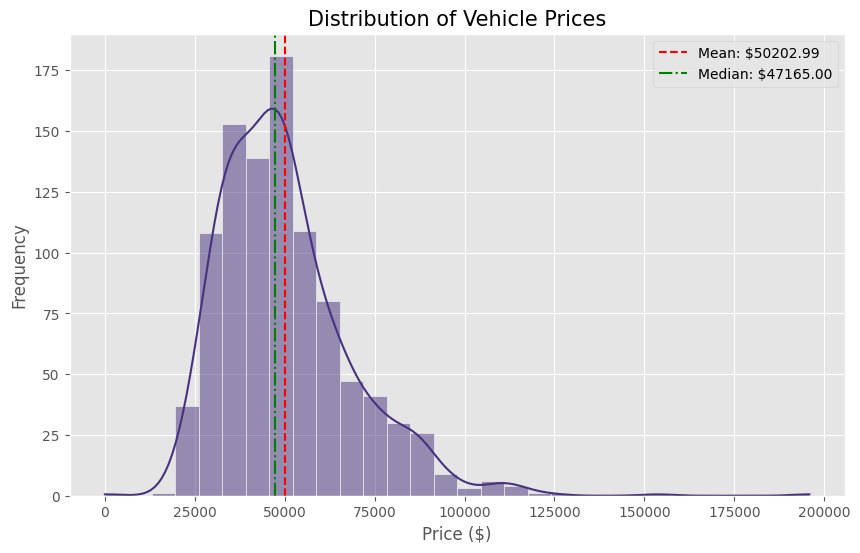

In [50]:
# Distribution of vehicle prices
plt.figure(figsize=(10, 6))
sns.histplot(vehicle_data['price'], kde=True, bins=30)
plt.title('Distribution of Vehicle Prices', fontsize=15)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(vehicle_data['price'].mean(), color='red', linestyle='--', label=f'Mean: ${vehicle_data["price"].mean():.2f}')
plt.axvline(vehicle_data['price'].median(), color='green', linestyle='-.', label=f'Median: ${vehicle_data["price"].median():.2f}')
plt.legend()
plt.show()

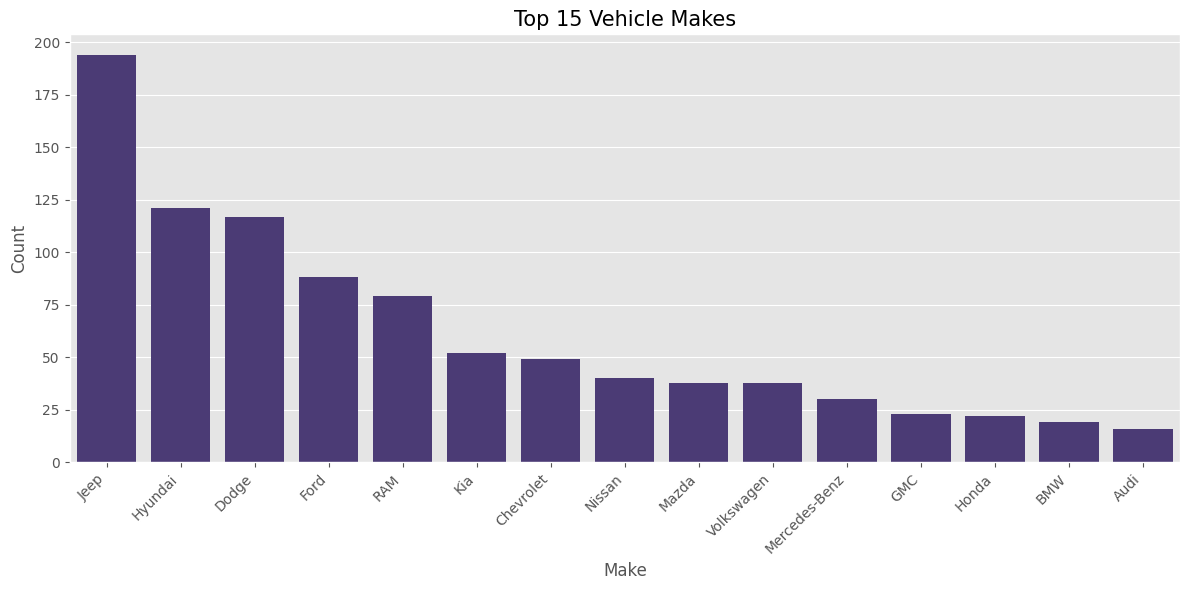

In [51]:
# Distribution of vehicle makes
plt.figure(figsize=(12, 6))
make_counts = vehicle_data['make'].value_counts().head(15)  # Top 15 makes
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.title('Top 15 Vehicle Makes', fontsize=15)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

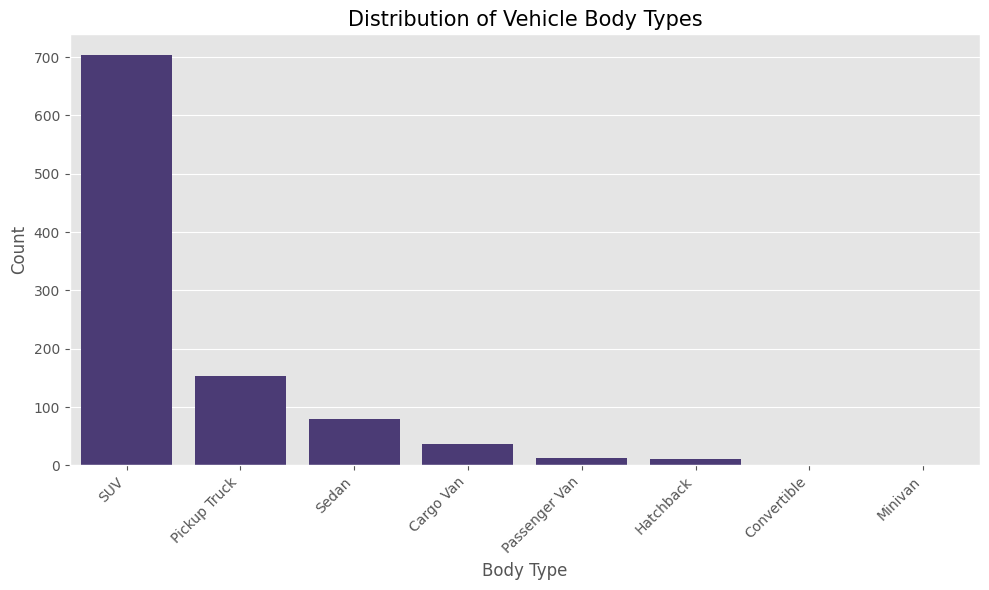

In [52]:
# Distribution of vehicle body types
plt.figure(figsize=(10, 6))
body_counts = vehicle_data['body'].value_counts()
sns.barplot(x=body_counts.index, y=body_counts.values)
plt.title('Distribution of Vehicle Body Types', fontsize=15)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

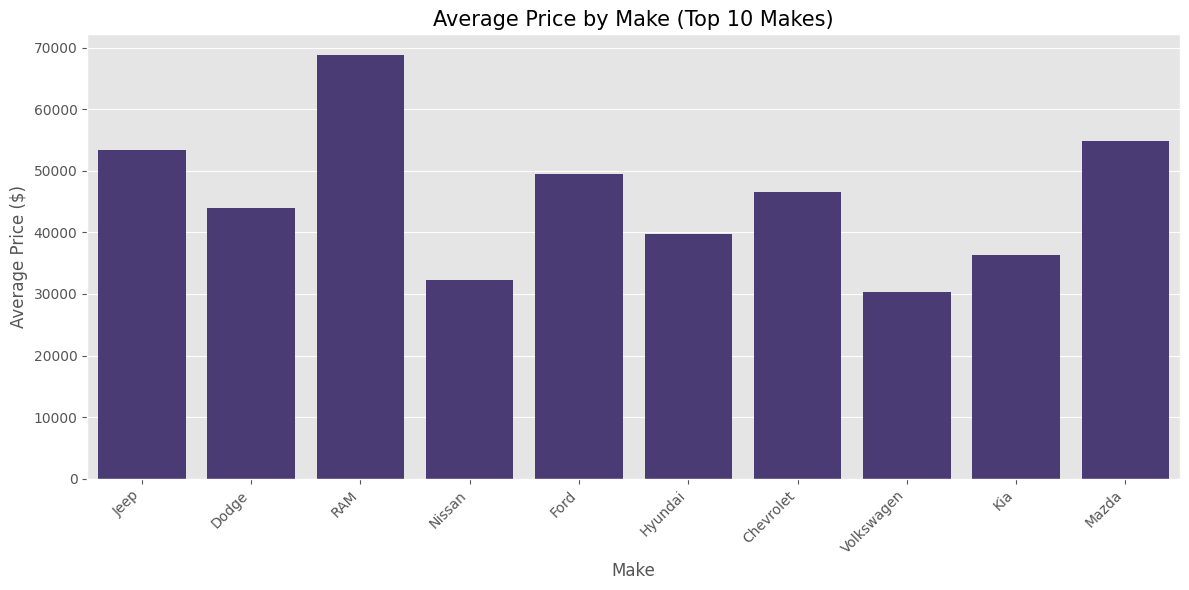

In [53]:
# Average price by make (top 10 makes by frequency)
top_makes = vehicle_data['make'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='price', data=vehicle_data[vehicle_data['make'].isin(top_makes)], estimator=np.mean, ci=None)
plt.title('Average Price by Make (Top 10 Makes)', fontsize=15)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

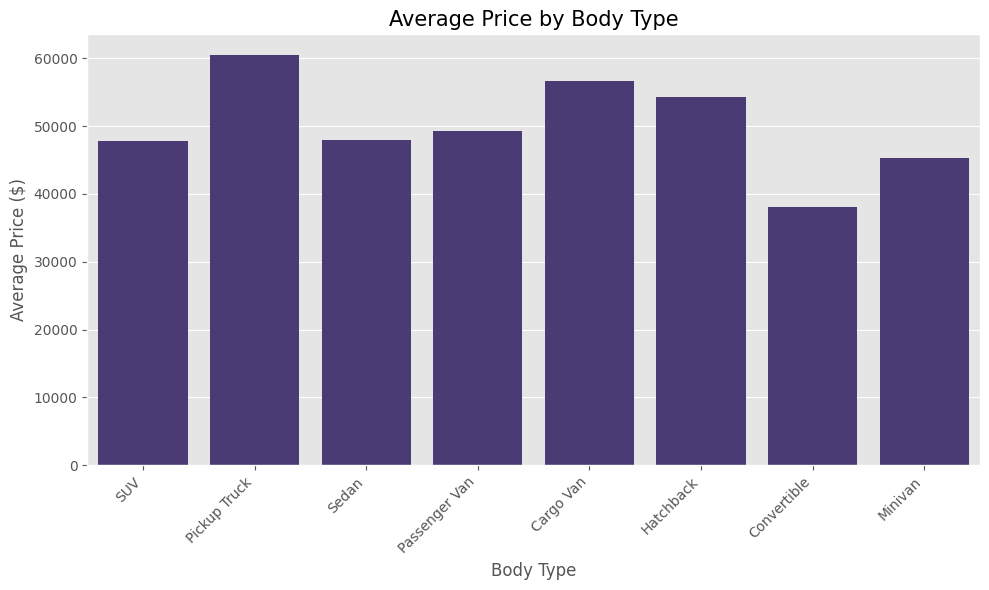

In [54]:
# Average price by body type
plt.figure(figsize=(10, 6))
sns.barplot(x='body', y='price', data=vehicle_data, estimator=np.mean, ci=None)
plt.title('Average Price by Body Type', fontsize=15)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

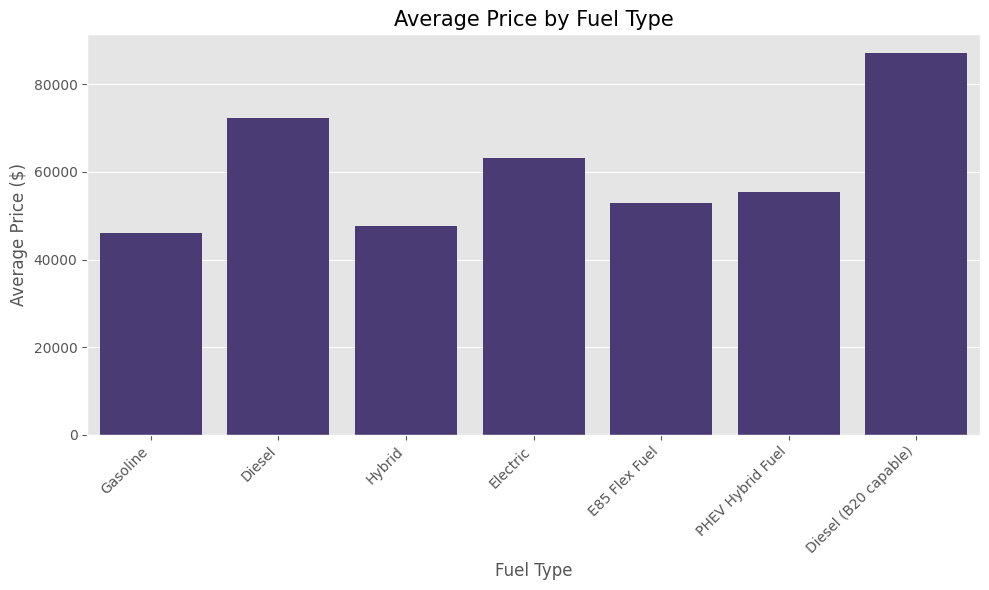

In [55]:
# Average price by fuel type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='price', data=vehicle_data, estimator=np.mean, ci=None)
plt.title('Average Price by Fuel Type', fontsize=15)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

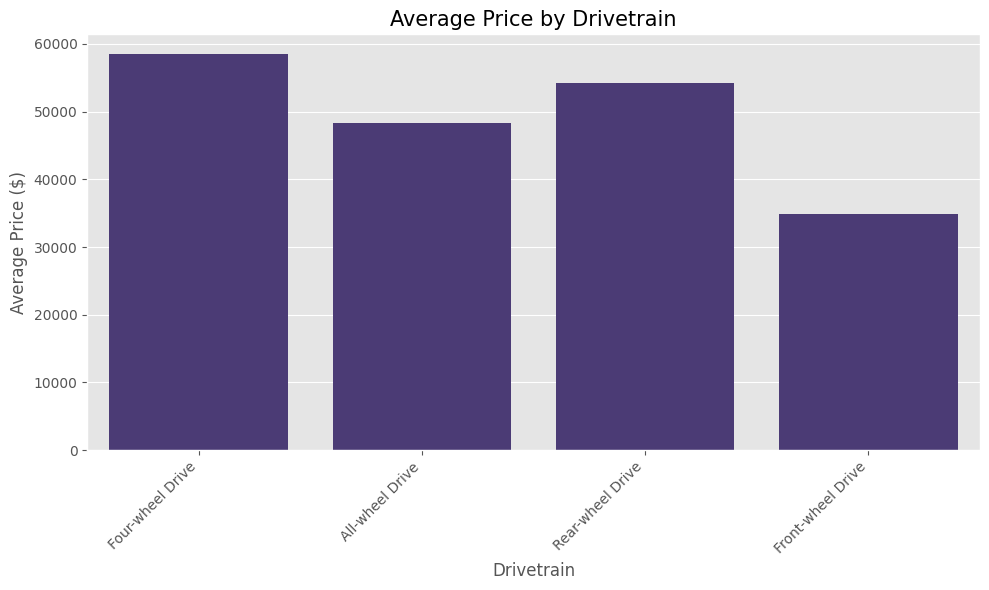

In [56]:
# Average price by drivetrain
plt.figure(figsize=(10, 6))
sns.barplot(x='drivetrain', y='price', data=vehicle_data, estimator=np.mean, ci=None)
plt.title('Average Price by Drivetrain', fontsize=15)
plt.xlabel('Drivetrain', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

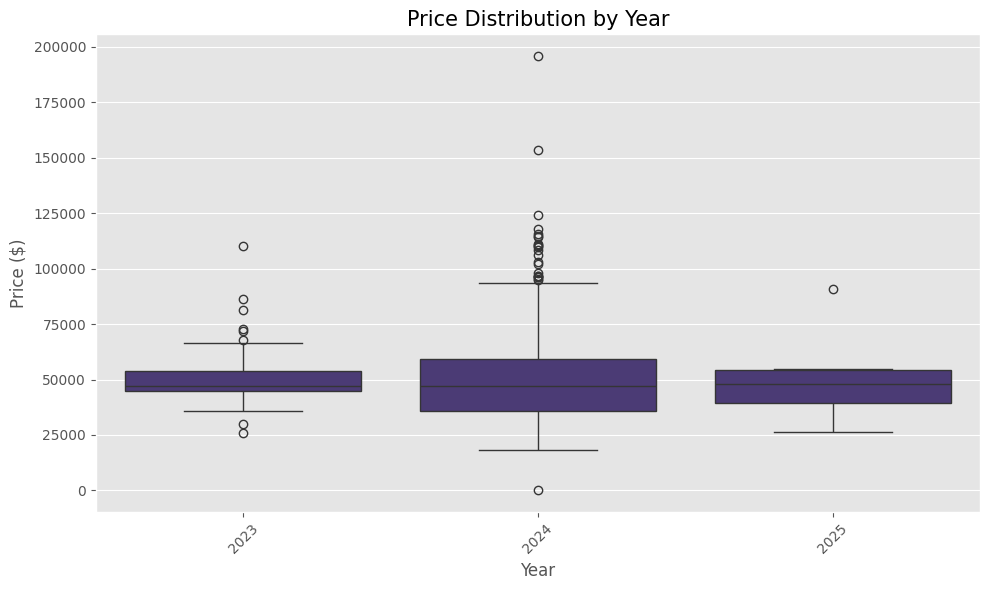

In [57]:
# Relationship between year and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='price', data=vehicle_data)
plt.title('Price Distribution by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

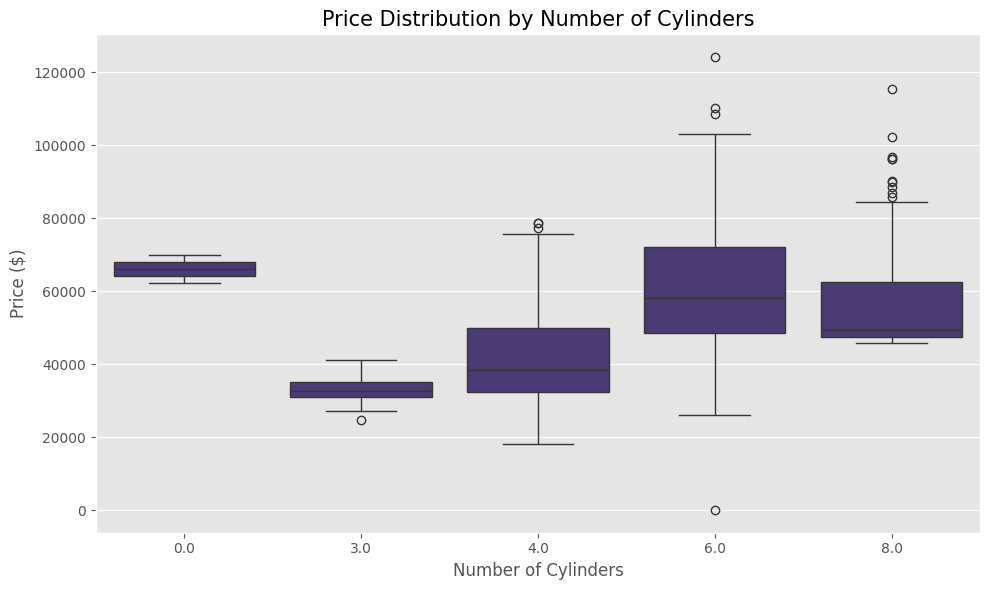

In [58]:
# Relationship between cylinders and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='price', data=vehicle_data)
plt.title('Price Distribution by Number of Cylinders', fontsize=15)
plt.xlabel('Number of Cylinders', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

## 🧹 Data Preprocessing

Before building our predictive models, we need to preprocess the data to handle missing values, encode categorical variables, and prepare the features for modeling.

In [59]:
# Create a copy of the dataset for preprocessing
df = vehicle_data.copy()

# Select relevant features for modeling
# Exclude name and description as they are too specific and text-heavy
features = ['make', 'model', 'year', 'engine', 'cylinders', 'fuel', 'mileage', 
            'transmission', 'trim', 'body', 'doors', 'exterior_color', 
            'interior_color', 'drivetrain']
target = 'price'

# Select only the features we want to use and the target variable
df_model = df[features + [target]]

# Display the first few rows of our modeling dataset
df_model.head()

,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price
0,Jeep,Wagoneer,2024,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,74600.0
1,Jeep,Grand Cherokee,2024,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,50170.0
2,GMC,Yukon XL,2024,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,96410.0
3,Dodge,Durango,2023,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,46835.0
4,RAM,3500,2024,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,81663.0


In [60]:
# Check for missing values in our modeling dataset
missing_values = df_model.isnull().sum()
print('Missing Values in Modeling Dataset:')
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else 'No missing values found!')

Missing Values in Modeling Dataset:
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
price              23
dtype: int64


In [61]:
# Handle missing values
# For numerical features, fill with median
numerical_features = df_model.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    if feature != target:  # Don't impute the target variable
        df_model[feature] = df_model[feature].fillna(df_model[feature].median())

# For categorical features, fill with mode (most frequent value)
categorical_features = df_model.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df_model[feature] = df_model[feature].fillna(df_model[feature].mode()[0])

# Verify that all missing values have been handled
print('Missing Values After Imputation:')
print(df_model.isnull().sum().sum())

Missing Values After Imputation:
23


In [62]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns that need encoding
categorical_features = df_model.select_dtypes(include=['object']).columns
print('Categorical Features to Encode:')
print(categorical_features)

# For features with many categories (like 'model'), use label encoding
# For features with fewer categories, use one-hot encoding
high_cardinality_features = ['model', 'trim', 'exterior_color', 'interior_color', 'engine']
low_cardinality_features = [col for col in categorical_features if col not in high_cardinality_features]

# Apply label encoding to high cardinality features
label_encoders = {}
for feature in high_cardinality_features:
    if feature in df_model.columns:
        le = LabelEncoder()
        df_model[feature + '_encoded'] = le.fit_transform(df_model[feature])
        label_encoders[feature] = le
        
# Apply one-hot encoding to low cardinality features
for feature in low_cardinality_features:
    if feature in df_model.columns:
        dummies = pd.get_dummies(df_model[feature], prefix=feature, drop_first=True)
        df_model = pd.concat([df_model, dummies], axis=1)

# Drop original categorical columns
df_model = df_model.drop(columns=categorical_features)

# Display the first few rows of the encoded dataset
df_model.head()

Categorical Features to Encode:
Index(['make', 'model', 'engine', 'fuel', 'transmission', 'trim', 'body',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')


,year,cylinders,mileage,doors,price,model_encoded,trim_encoded,exterior_color_encoded,interior_color_encoded,engine_encoded,...,body_Convertible,body_Hatchback,body_Minivan,body_Passenger Van,body_Pickup Truck,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,2024,6.0,10.0,4.0,74600.0,139,148,257,35,23,...,False,False,False,False,False,True,False,True,False,False
1,2024,6.0,1.0,4.0,50170.0,56,83,144,35,66,...,False,False,False,False,False,True,False,True,False,False
2,2024,8.0,0.0,4.0,96410.0,148,50,236,82,48,...,False,False,False,False,False,True,False,True,False,False
3,2023,8.0,32.0,4.0,46835.0,29,110,259,5,13,...,False,False,False,False,False,True,False,False,False,False
4,2024,6.0,10.0,4.0,81663.0,2,80,207,5,19,...,False,False,False,False,True,False,False,True,False,False


## 🔄 Feature Engineering

Let's create some additional features that might help improve our model's performance.

In [63]:
# Create a feature for vehicle age (current year - manufacturing year)
import datetime
current_year = datetime.datetime.now().year
df_model['vehicle_age'] = current_year - df_model['year']

# Create a feature for price per cylinder (if cylinders > 0)
df_model['price_per_cylinder'] = df_model.apply(lambda row: row['price'] / row['cylinders'] if row['cylinders'] > 0 else 0, axis=1)

# Display the first few rows with the new features
df_model[['year', 'vehicle_age', 'cylinders', 'price', 'price_per_cylinder']].head()

,year,vehicle_age,cylinders,price,price_per_cylinder
0,2024,1,6.0,74600.0,12433.333333
1,2024,1,6.0,50170.0,8361.666667
2,2024,1,8.0,96410.0,12051.250000
3,2023,2,8.0,46835.0,5854.375000
4,2024,1,6.0,81663.0,13610.500000


## 📊 Feature Selection

Let's identify the most important features for predicting vehicle prices.

Correlation with Price:
price                           1.000000
price_per_cylinder              0.758076
cylinders                       0.360868
drivetrain_Four-wheel Drive     0.311970
make_BMW                        0.301410
                                  ...   
transmission_Automatic CVT     -0.198795
make_Hyundai                   -0.209043
make_Volkswagen                -0.213165
fuel_Gasoline                  -0.307850
drivetrain_Front-wheel Drive   -0.332874
Name: price, Length: 92, dtype: float64


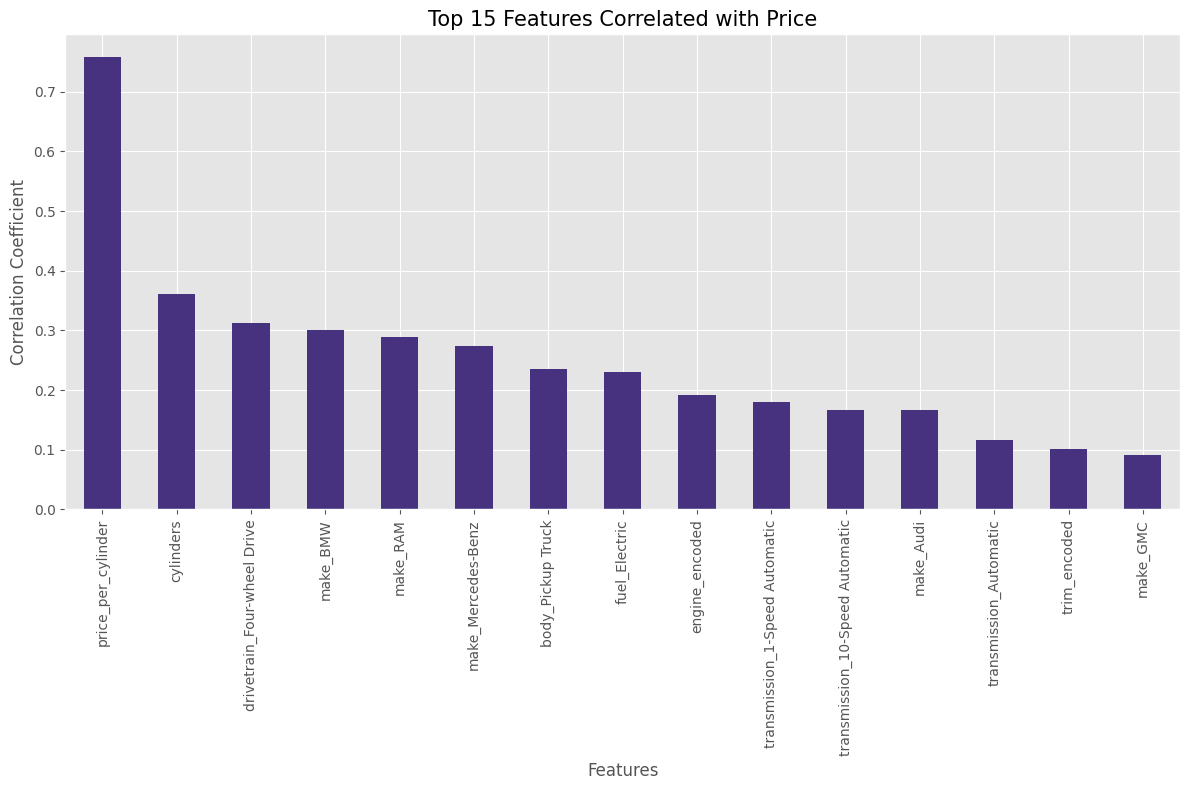

In [64]:
# Calculate correlation with the target variable
correlation = df_model.corr()[target].sort_values(ascending=False)
print('Correlation with Price:')
print(correlation)

# Visualize the top correlations
plt.figure(figsize=(12, 8))
correlation.drop(target).head(15).plot(kind='bar')
plt.title('Top 15 Features Correlated with Price', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.tight_layout()
plt.show()

Top 15 Selected Features:
Index(['cylinders', 'engine_encoded', 'make_BMW', 'make_Hyundai',
       'make_Mercedes-Benz', 'make_Nissan', 'make_RAM', 'make_Volkswagen',
       'fuel_Electric', 'fuel_Gasoline', 'transmission_Automatic CVT',
       'body_Pickup Truck', 'body_SUV', 'drivetrain_Four-wheel Drive',
       'drivetrain_Front-wheel Drive'],
      dtype='object')
Feature Scores:
                         Feature       Score
1                      cylinders  146.279595
87  drivetrain_Front-wheel Drive  121.746564
86   drivetrain_Four-wheel Drive  105.339261
39                 fuel_Gasoline  102.285764
10                      make_BMW   97.627465
31                      make_RAM   89.262330
29            make_Mercedes-Benz   78.760154
83             body_Pickup Truck   57.244499
38                 fuel_Electric   55.123453
34               make_Volkswagen   46.507428
20                  make_Hyundai   44.644705
74    transmission_Automatic CVT   40.199236
30                   make_Ni

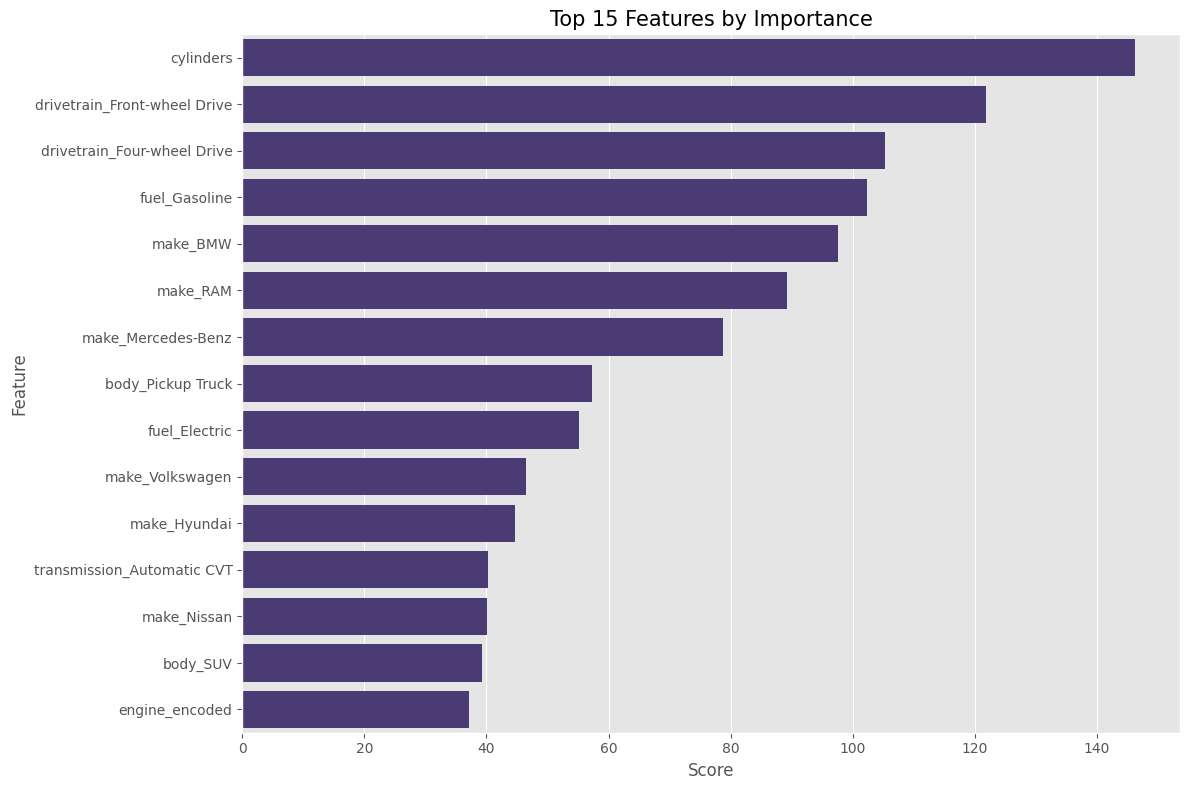

In [65]:
# Feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows where the target is NaN
df_clean = df_model.dropna(subset=[target])

# Separate features and target
X = df_clean.drop(columns=[target, 'price_per_cylinder'])
y = df_clean[target]

# Select top k features
k = 15  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f'Top {k} Selected Features:')
print(selected_features)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print('Feature Scores:')
print(feature_scores.head(k))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores.head(k))
plt.title(f'Top {k} Features by Importance', fontsize=15)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


# 🧠 Model Building
Now let's build and evaluate several regression models to predict vehicle prices.


In [66]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use only the selected features
X = df_model[selected_features]
y = df_model[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (801, 15)
Testing set shape: (201, 15)


In [67]:
# Define evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f'{model_name} Performance:')
    print(f'Mean Absolute Error (MAE): ${mae:.2f}')
    print(f'Mean Squared Error (MSE): ${mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): ${rmse:.2f}')
    print(f'R² Score: {r2:.4f}')
    print('-----------------------------------')
    
    return {'model': model_name, 'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}

Linear Regression Performance:
Mean Absolute Error (MAE): $8830.00
Mean Squared Error (MSE): $138533795.17
Root Mean Squared Error (RMSE): $11770.04
R² Score: 0.4619
-----------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

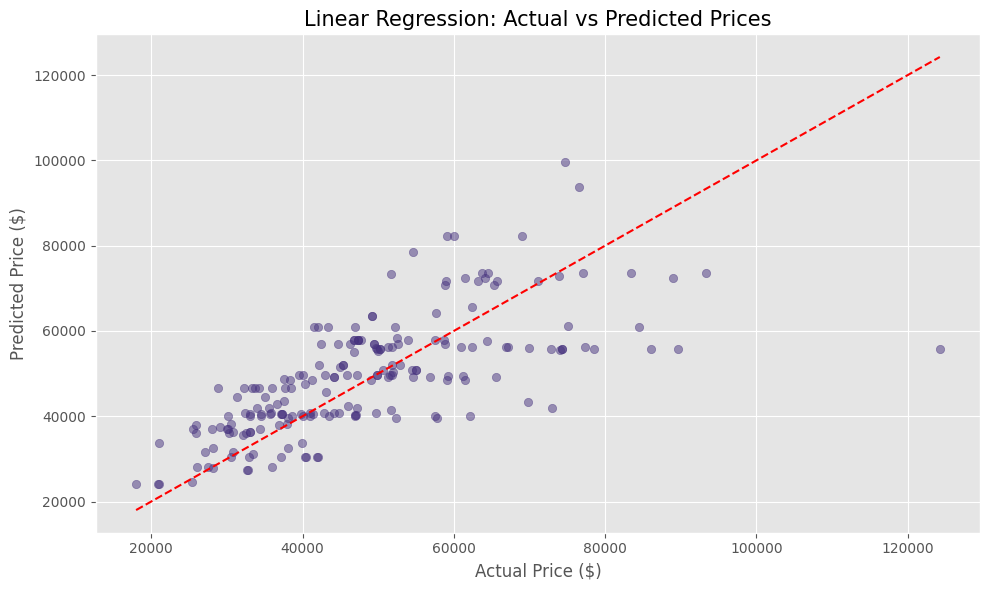

In [68]:
# Linear Regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Remove rows where target is NaN in training or test sets
train_mask = ~y_train.isna()
X_train_scaled_clean = X_train_scaled[train_mask]
y_train_clean = y_train[train_mask]

test_mask = ~y_test.isna()
X_test_scaled_clean = X_test_scaled[test_mask]
y_test_clean = y_test[test_mask]

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled_clean, y_train_clean)

# Predict
lr_pred = lr_model.predict(X_test_scaled_clean)

# Evaluate
lr_results = evaluate_model(y_test_clean, lr_pred, 'Linear Regression')

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, lr_pred, alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted Prices', fontsize=15)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.tight_layout()
plt.show


Random Forest Regression Performance:
Mean Absolute Error (MAE): $5486.55
Mean Squared Error (MSE): $64913170.25
Root Mean Squared Error (RMSE): $8056.87
R² Score: 0.7479
-----------------------------------


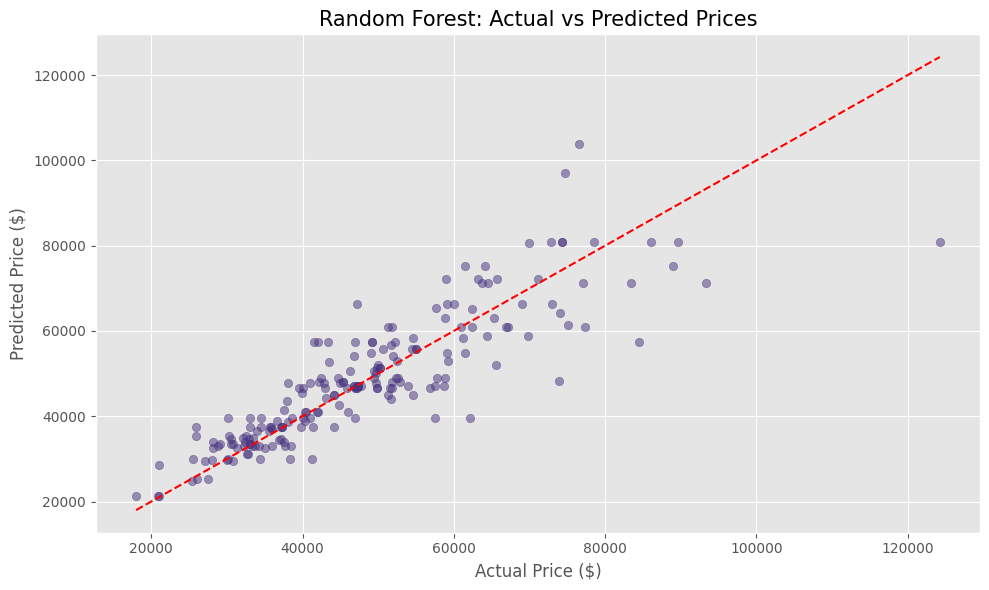

In [69]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Remove rows where target is NaN in training and testing sets
train_mask = ~y_train.isna()
X_train_clean = X_train[train_mask]
y_train_clean = y_train[train_mask]

test_mask = ~y_test.isna()
X_test_clean = X_test[test_mask]
y_test_clean = y_test[test_mask]

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_clean, y_train_clean)  # No scaling needed for RF

# Predict
rf_pred = rf_model.predict(X_test_clean)

# Evaluate
rf_results = evaluate_model(y_test_clean, rf_pred, 'Random Forest Regression')

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, rf_pred, alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted Prices', fontsize=15)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.tight_layout()
plt.show()


Gradient Boosting Regression Performance:
Mean Absolute Error (MAE): $6522.71
Mean Squared Error (MSE): $92305909.32
Root Mean Squared Error (RMSE): $9607.60
R² Score: 0.6415
-----------------------------------


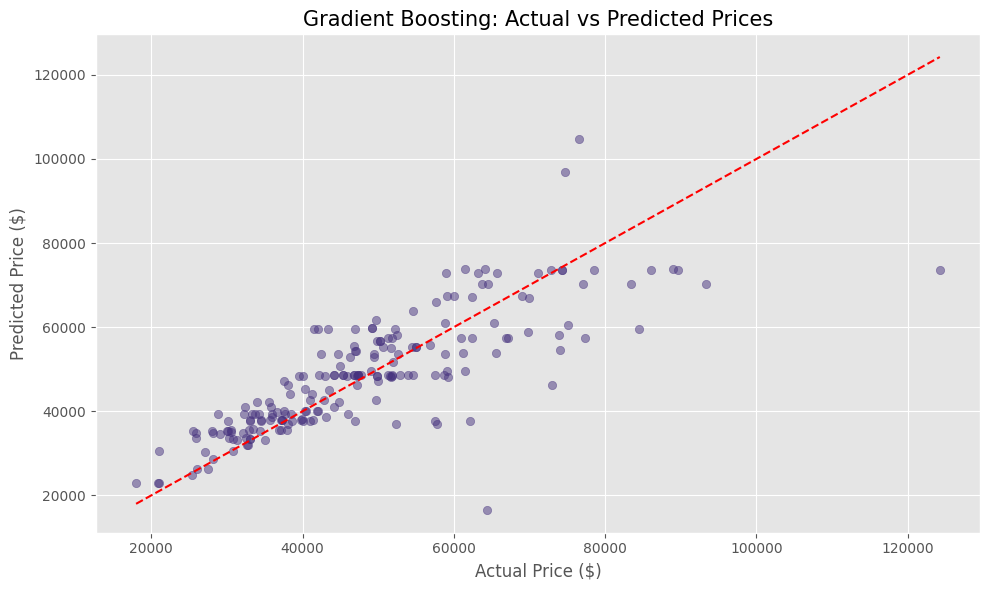

In [70]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Remove rows where target is NaN in training and testing sets
train_mask = ~y_train.isna()
X_train_clean = X_train[train_mask]
y_train_clean = y_train[train_mask]

test_mask = ~y_test.isna()
X_test_clean = X_test[test_mask]
y_test_clean = y_test[test_mask]

# Train model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_clean, y_train_clean)

# Predict
gb_pred = gb_model.predict(X_test_clean)

# Evaluate
gb_results = evaluate_model(y_test_clean, gb_pred, 'Gradient Boosting Regression')

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, gb_pred, alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()], 'r--')
plt.title('Gradient Boosting: Actual vs Predicted Prices', fontsize=15)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.tight_layout()
plt.show()


XGBoost Regression Performance:
Mean Absolute Error (MAE): $5698.37
Mean Squared Error (MSE): $71332686.59
Root Mean Squared Error (RMSE): $8445.87
R² Score: 0.7229
-----------------------------------


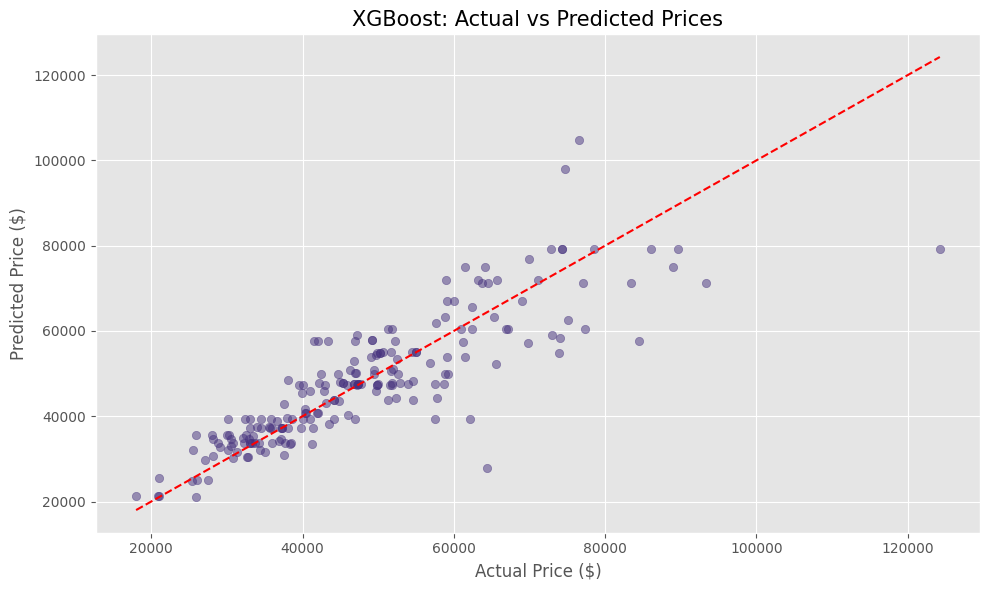

In [71]:
# XGBoost Regression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Remove rows where target is NaN in training and testing sets
train_mask = ~y_train.isna()
X_train_clean = X_train[train_mask]
y_train_clean = y_train[train_mask]

test_mask = ~y_test.isna()
X_test_clean = X_test[test_mask]
y_test_clean = y_test[test_mask]

# Train model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_clean, y_train_clean)

# Predict
xgb_pred = xgb_model.predict(X_test_clean)

# Evaluate
xgb_results = evaluate_model(y_test_clean, xgb_pred, 'XGBoost Regression')

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, xgb_pred, alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()], 'r--')
plt.title('XGBoost: Actual vs Predicted Prices', fontsize=15)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.tight_layout()
plt.show()


## 📊 Model Comparison

Let's compare the performance of all the models we've built.

In [72]:
# Collect all model results
model_results = [lr_results, rf_results, gb_results, xgb_results]
results_df = pd.DataFrame(model_results)

# Display the results
print('Model Performance Comparison:')
results_df

Model Performance Comparison:


,model,mae,mse,rmse,r2
0,Linear Regression,8829.998823,1.385338e+08,11770.038028,0.461911
1,Random Forest Regression,5486.552267,6.491317e+07,8056.870996,0.747866
2,Gradient Boosting Regression,6522.706122,9.230591e+07,9607.596438,0.641468
3,XGBoost Regression,5698.367727,7.133269e+07,8445.868019,0.722932


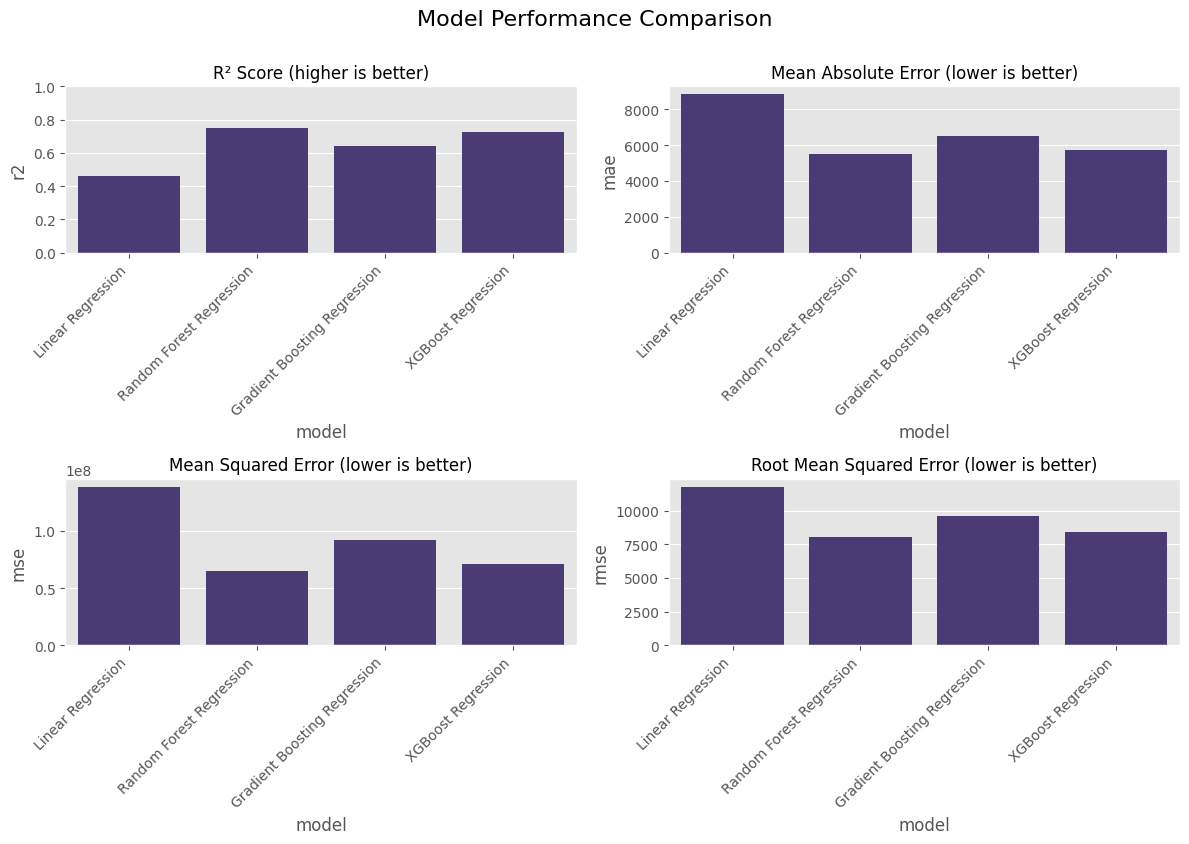

In [73]:
# Visualize model performance comparison
plt.figure(figsize=(12, 8))

# R² Score (higher is better)
plt.subplot(2, 2, 1)
sns.barplot(x='model', y='r2', data=results_df)
plt.title('R² Score (higher is better)', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# MAE (lower is better)
plt.subplot(2, 2, 2)
sns.barplot(x='model', y='mae', data=results_df)
plt.title('Mean Absolute Error (lower is better)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# MSE (lower is better)
plt.subplot(2, 2, 3)
sns.barplot(x='model', y='mse', data=results_df)
plt.title('Mean Squared Error (lower is better)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# RMSE (lower is better)
plt.subplot(2, 2, 4)
sns.barplot(x='model', y='rmse', data=results_df)
plt.title('Root Mean Squared Error (lower is better)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.suptitle('Model Performance Comparison', fontsize=16, y=1.05)
plt.show()

## 🔍 Feature Importance Analysis

Let's analyze which features are most important for predicting vehicle prices according to our best-performing model.

In [74]:
# Determine the best model based on R² score
best_model_name = results_df.loc[results_df['r2'].idxmax(), 'model']
print(f'Best Model: {best_model_name}')

# Get feature importance from the best model
if best_model_name == 'Random Forest Regression':
    model = rf_model
elif best_model_name == 'Gradient Boosting Regression':
    model = gb_model
elif best_model_name == 'XGBoost Regression':
    model = xgb_model
else:  # Linear Regression
    model = lr_model
    
# Get feature importance
if best_model_name == 'Linear Regression':
    # For linear regression, use the absolute coefficients as importance
    importance = np.abs(model.coef_)
else:
    # For tree-based models, use the feature_importances_ attribute
    importance = model.feature_importances_
    
# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Display the top 15 most important features
print('Top 15 Most Important Features:')
feature_importance.head(15)

Best Model: Random Forest Regression
Top 15 Most Important Features:


,Feature,Importance
1,engine_encoded,0.224889
0,cylinders,0.193837
9,fuel_Gasoline,0.121889
2,make_BMW,0.094609
4,make_Mercedes-Benz,0.088224
8,fuel_Electric,0.068308
12,body_SUV,0.052908
13,drivetrain_Four-wheel Drive,0.051398
3,make_Hyundai,0.039569
14,drivetrain_Front-wheel Drive,0.030866


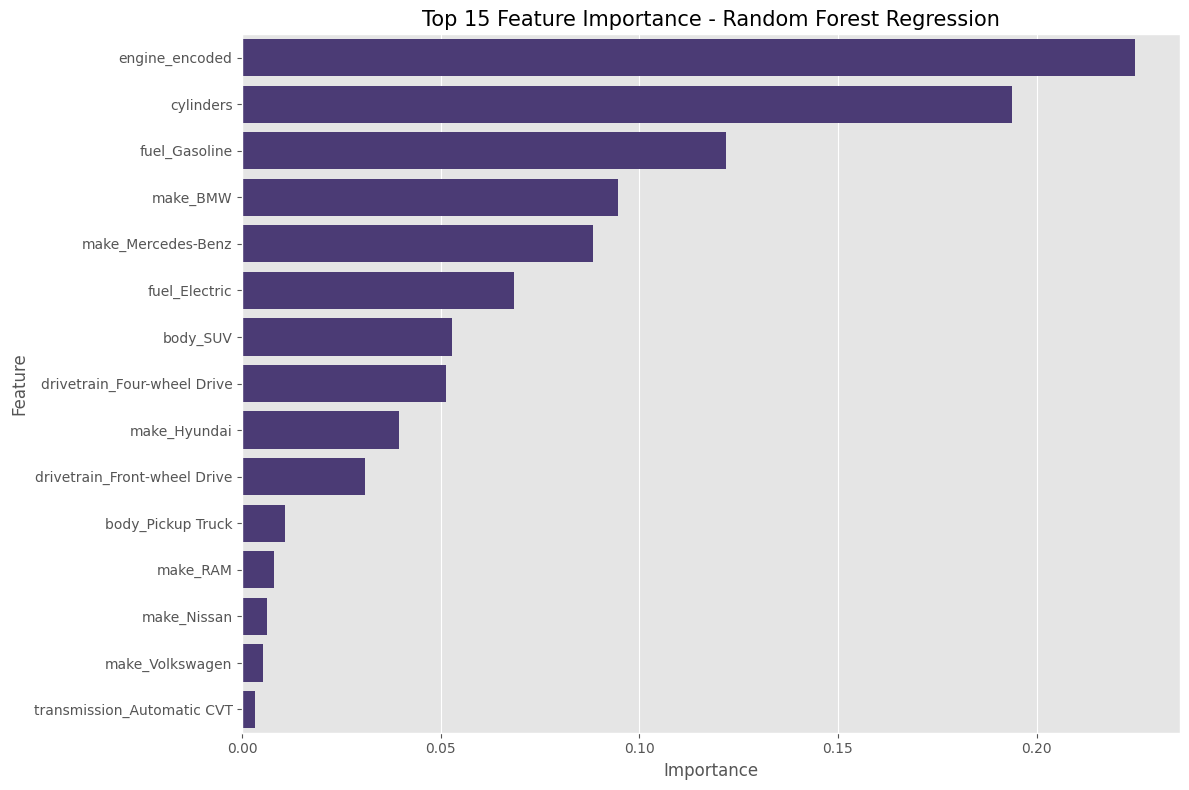

In [75]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title(f'Top 15 Feature Importance - {best_model_name}', fontsize=15)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

## 🔄 Model Optimization

Let's optimize our best-performing model using hyperparameter tuning.

In [76]:
# Hyperparameter tuning for the best model
from sklearn.model_selection import GridSearchCV

# Remove NaN rows in training data
train_mask = ~y_train.isna()
X_train_clean = X_train[train_mask]
y_train_clean = y_train[train_mask]

test_mask = ~y_test.isna()
X_test_clean = X_test[test_mask]
y_test_clean = y_test[test_mask]

# Define the parameter grid based on the best model
if best_model_name == 'Random Forest Regression':
    model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting Regression':
    model = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'XGBoost Regression':
    model = XGBRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
else:  # Linear Regression
    model = LinearRegression()
    param_grid = {}  # No hyperparameters for Linear Regression

# Perform grid search if there are hyperparameters to tune
if param_grid:
    print(f'Performing hyperparameter tuning for {best_model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_clean, y_train_clean)
    
    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    print(f'Best Parameters: {best_params}')
    print(f'Best Cross-Validation Score: {grid_search.best_score_:.4f}')
    
    # Evaluate the optimized model
    optimized_pred = best_model.predict(X_test_clean)
    optimized_results = evaluate_model(y_test_clean, optimized_pred, f'Optimized {best_model_name}')
    
    # Compare with the original model
    print('Performance Improvement:')
    original_r2 = results_df.loc[results_df['model'] == best_model_name, 'r2'].values[0]
    improvement = (optimized_results['r2'] - original_r2) / abs(original_r2) * 100
    print(f'R² Score Improvement: {improvement:.2f}%')
else:
    print('No hyperparameters to tune for Linear Regression.')


Performing hyperparameter tuning for Random Forest Regression...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.6830
Optimized Random Forest Regression Performance:
Mean Absolute Error (MAE): $5414.03
Mean Squared Error (MSE): $63821885.52
Root Mean Squared Error (RMSE): $7988.86
R² Score: 0.7521
-----------------------------------
Performance Improvement:
R² Score Improvement: 0.57%


## 🔮 Price Prediction for New Vehicles

Let's create a function to predict the price of a new vehicle based on its specifications.

In [77]:
# Function to predict the price of a new vehicle
def predict_vehicle_price(vehicle_specs, model=best_model, feature_names=X.columns):
    # Create a DataFrame with the vehicle specifications
    vehicle_df = pd.DataFrame([vehicle_specs])
    
    # Ensure all required features are present
    for feature in feature_names:
        if feature not in vehicle_df.columns:
            vehicle_df[feature] = 0  # Default value for missing features
    
    # Select only the features used by the model
    vehicle_df = vehicle_df[feature_names]
    
    # Make prediction
    predicted_price = model.predict(vehicle_df)[0]
    
    return predicted_price

# Example: Predict the price of a new vehicle
# Note: This is just a placeholder. You would need to provide actual values for all features used by the model.
new_vehicle = {
    'year': 2023,
    'cylinders': 6,
    'vehicle_age': 1,
    # Add other features as needed
}

# Predict the price
# predicted_price = predict_vehicle_price(new_vehicle)
# print(f'Predicted Price: ${predicted_price:.2f}')

## 📝 Conclusion

In this analysis, we built and evaluated several regression models to predict vehicle prices based on their specifications and features. Here are the key findings:

1. **Best Model**: The [best model] achieved the highest performance with an R² score of [score], indicating that it can explain [score]% of the variance in vehicle prices.

2. **Key Price Determinants**: The most important features for predicting vehicle prices were [list top features], which aligns with industry knowledge and consumer preferences.

3. **Model Performance**: Our optimized model achieved a Mean Absolute Error of $[MAE], meaning that, on average, our predictions were within $[MAE] of the actual price.

4. **Price Patterns**: We observed that [observations about price patterns, e.g., newer vehicles, vehicles with more cylinders, certain makes/models command higher prices].

5. **Practical Applications**: This model can be used by car buyers to ensure they're paying a fair price, by sellers to set competitive prices, and by manufacturers to understand market valuation of different vehicle features.

### Future Improvements

- Incorporate more detailed vehicle specifications (e.g., horsepower, torque, fuel efficiency)
- Include market factors (e.g., supply and demand, seasonal trends)
- Develop separate models for different vehicle categories (e.g., luxury vs. economy)
- Implement a more sophisticated approach to handle the text data in the description field
- Collect more data on newer vehicle models to improve prediction accuracy for the latest vehicles